<a href="https://colab.research.google.com/github/w1767/w1767/blob/main/FB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: this program uses an aritificial recurrent neural network called Long Short Term Memory (LSTM) to predict
# the closing stock price of a corporation (FB Inc.) using the past 60 day stock price. 

In [ ]:
# Import the libraries
!pip install pandas_datareader
!pip install yfinance
!pip install mplfinance
import os
import argparse
import signal
import yfinance as yf
import pickle
import mplfinance as mpf
import math
import pandas_datareader.data as web
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
#from yfinance import stock_info
from dateutil.parser import parse
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
start_date = datetime(2020, 1,1)
end_date = datetime(2021, 8, 2)


In [ ]:
#Get the stock quote
data = yf.download('FB', start=start_date, end=end_date)
#df = web.DataReader('FB', data_source='yahoo',start='2012-01',end='2019-12-17')
#show the data
data.head(391)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,206.750000,209.789993,206.270004,209.779999,209.779999,12077100
2020-01-03,207.210007,210.399994,206.949997,208.669998,208.669998,11188400
2020-01-06,206.699997,212.779999,206.520004,212.600006,212.600006,17058900
2020-01-07,212.820007,214.580002,211.750000,213.059998,213.059998,14912400
2020-01-08,213.000000,216.240005,212.610001,215.220001,215.220001,13475000
...,...,...,...,...,...,...
2021-07-15,349.230011,349.230011,340.220001,344.459991,344.459991,14781600
2021-07-16,344.910004,345.989990,340.140015,341.160004,341.160004,11020300
2021-07-19,337.570007,339.790009,334.540009,336.950012,336.950012,14372300


In [ ]:
#Get the number of rows and columns in the data set
data.shape



(398, 6)

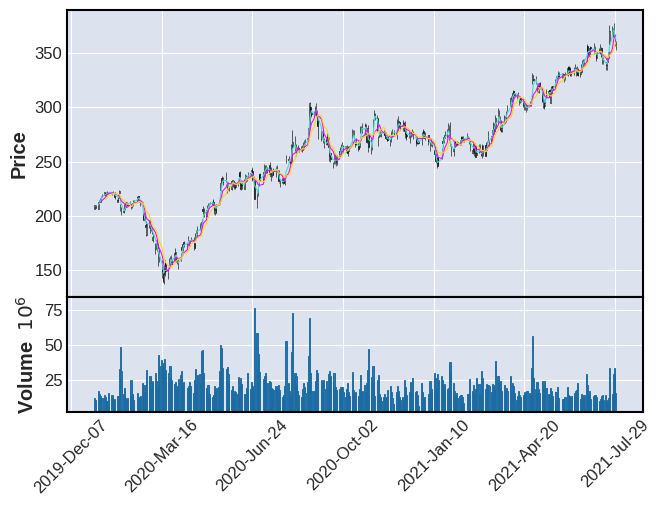

In [ ]:
mpf.plot(data, type='candle', mav= (3,6,9), volume=True, show_nontrading=True)
#Visualize the closing price history
#plt.figure(figsize=(16,8))
#plt.title('Close Price History')
#plt.plot(df['Close'])
#plt.xlabel('Date',fontsize=18)
#plt.ylabel('Close Price USD($)',fontsize=18)
#plt.show()

In [ ]:
#Create a new dataframe with only the 'Close column'
data = data.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

319

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data



array([[0.28059138],
       [0.27570732],
       [0.29299956],
       [0.29502355],
       [0.30452768],
       [0.31807985],
       [0.31702381],
       [0.33396404],
       [0.32142386],
       [0.33061996],
       [0.33334804],
       [0.33497603],
       [0.33189601],
       [0.33136803],
       [0.32450389],
       [0.31649583],
       [0.30298763],
       [0.31583578],
       [0.33977208],
       [0.27949137],
       [0.24596299],
       [0.2559951 ],
       [0.2808114 ],
       [0.28204341],
       [0.28529947],
       [0.29181153],
       [0.29502355],
       [0.26919526],
       [0.28490341],
       [0.29537556],
       [0.29995159],
       [0.31587982],
       [0.31451582],
       [0.30171165],
       [0.28235137],
       [0.24072691],
       [0.22334672],
       [0.22523871],
       [0.19245833],
       [0.20442648],
       [0.22189469],
       [0.17547412],
       [0.20130241],
       [0.17230608],
       [0.15435386],
       [0.10335726],
       [0.14159373],
       [0.106

In [ ]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i <= 60:
    print (x_train)
    print (y_train)
    print ()

[array([0.28059138, 0.27570732, 0.29299956, 0.29502355, 0.30452768,
       0.31807985, 0.31702381, 0.33396404, 0.32142386, 0.33061996,
       0.33334804, 0.33497603, 0.33189601, 0.33136803, 0.32450389,
       0.31649583, 0.30298763, 0.31583578, 0.33977208, 0.27949137,
       0.24596299, 0.2559951 , 0.2808114 , 0.28204341, 0.28529947,
       0.29181153, 0.29502355, 0.26919526, 0.28490341, 0.29537556,
       0.29995159, 0.31587982, 0.31451582, 0.30171165, 0.28235137,
       0.24072691, 0.22334672, 0.22523871, 0.19245833, 0.20442648,
       0.22189469, 0.17547412, 0.20130241, 0.17230608, 0.15435386,
       0.10335726, 0.14159373, 0.10661333, 0.03722448, 0.1067893 ,
       0.        , 0.0150042 , 0.0041801 , 0.03132842, 0.0163682 ,
       0.00919616, 0.06586879, 0.04488059, 0.07625292, 0.04743256])]
[0.0877370619375768]



In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(259, 60, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))



In [ ]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

259/259 [==============================] - 11s 29ms/step - loss: 0.0276


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)



In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [ ]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

24.71690735635878

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


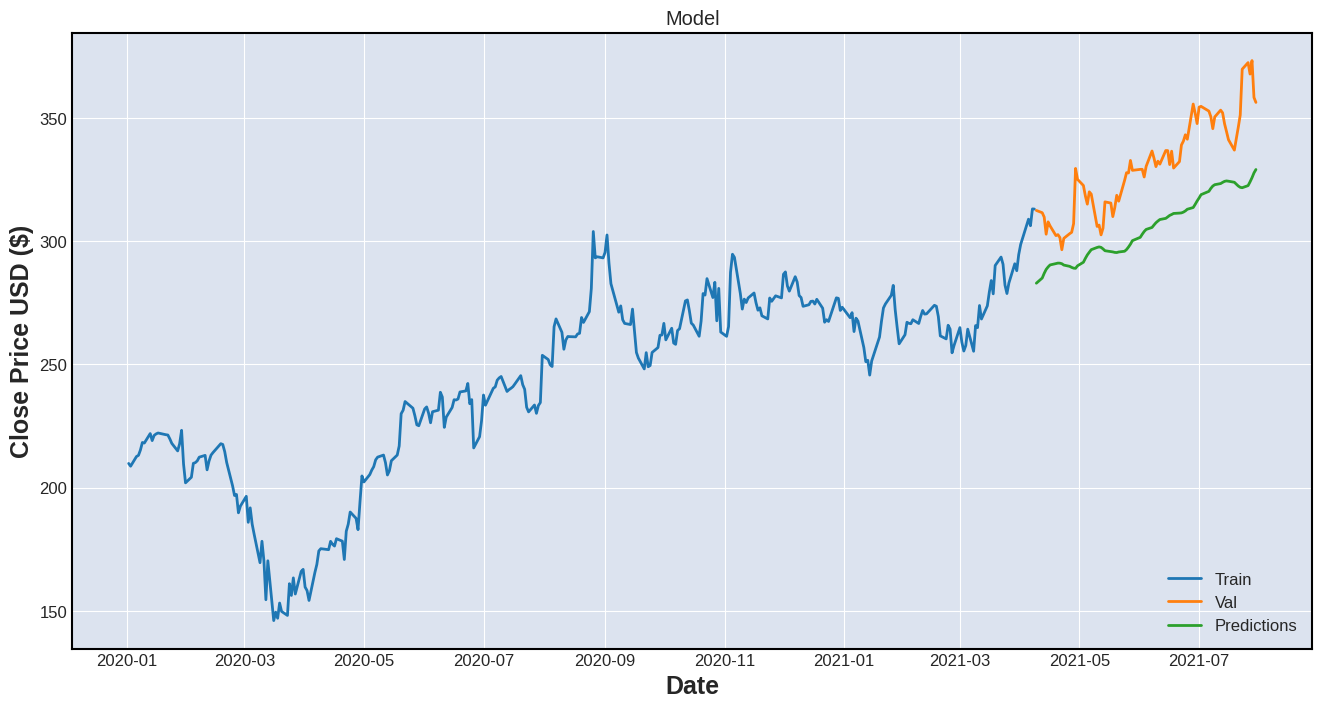

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [ ]:
#show the valid and predicted return
valid

,Close,Predictions
Date,,
2021-04-09,312.459991,282.932404
2021-04-12,311.540009,285.036957
2021-04-13,309.760010,286.932007
2021-04-14,302.820007,288.518799
2021-04-15,307.820007,289.534515
...,...,...
2021-07-26,372.459991,322.535065
2021-07-27,367.809998,324.057526
2021-07-28,373.279999,325.743225


In [ ]:
#get the quote
apple_quote = yf.download('FB', start=start_date, end=end_date)
#Create a new dataframe
new_data = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[*********************100%***********************]  1 of 1 completed
[[329.9738]]
